<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Forecasting Models

### Learning Objectives
 - Define time series analysis and time series forecasting models.
 - Discuss the unique properties of time series models.

### Lesson Guide

#### Time Series: Forecasting Models
- [Time Series Forecasting Models](#A)
- [Properties of Time Series Forecasting Models](#B)
----

<h2><a id="A">Time Series Forecasting Models</a></h2>

The analyses we've been doing in previous section qualify as 'time series analysis'.

>**Time series analysis** comprises methods for analyzing time series data in order >to extract meaningful statistics and other characteristics of the data.

>In the last class, we focused on exploring time series data and common statistics for time series analysis. In this class, we will advance those techniques to show how to predict or forecast forward from time series data.
>
>Said another way: Using the techniques covered in this class, we'll be able to use a sequence of values (a time series) to predict future values.

There are many examples of when you may want to use a series of values to predict a future value:

- The number of sales in a future month

- Anticipated website traffic when buying a server

- Financial forecasting

- The number of visitors to your store during the holidays

### What Are Time Series Models?

- Time series models are models that will be used to predict a future value in the time series.

- **Like** other predictive models, we will use prior history to predict the future.

- **Unlike** previous models, we will use the earlier outcomes as inputs for predictions.

<img src="./assets/ts_model.png" style="float: center; height: 375px">


**Time series forecasting** is the use of a model to predict future values based on previously observed values. We will discuss these types of models in this section. 

- As with the modeling you're used to, we will have to evaluate different models to ensure that we have chosen the best one.

- So, we will want to evaluate on _test data_ to ensure that our model performs well on unseen data.

### What Makes Time Series Data Special?

Time series data are time dependent. So, the basic assumption of a linear regression model — that the observations are independent — falls apart. Often, time series data include some sort of trend or may have seasonality.

<h2><a id = "B">Properties of Time Series Forecasting Models</a></h2>

### Training and Testing Sets

**Unlike** previous modeling exercises, we won’t be able to use standard cross-validation for evaluation. Time series data have a natural temporal ordering, which makes them different from the studies we've seen in other lessons in which there was no natural ordering of observations. 

Because these data are ordered, we **cannot choose training and testing examples at random.** As we are attempting to predict _a sequence of future values_, we must train on values from earlier (in time) in our data and then test our values at the end of the period.

Suppose we did select a random 80% sample of data points for training and a random 20% for testing.

**What could go wrong?**

> The training dataset would likely contain data from before AND after a test dataset.
>
> This would not be possible in real life! You can’t use future, unseen data points when building your model. Therefore, it’s not a valid test of how our model would perform in practice.

Instead, we will exclusively train on values earlier (in time) in our data and test our model on values at the end of the data period.

<img src="./assets/ts_validation.png" style="float: center; height: 300px">

### Moving Averages and Autocorrelation

In previous sections, we learned about a few statistics for analyzing time series. A **moving average** is the average of *k* preceding data points in time.

$${\Huge F_t = \frac{1}{p} \sum_{k=t}^{t-p+1}Y_k}$$

We just take the $p$ points from $t$ to $t-p+1$, and divide by the $p$ preceding data points.

We also looked at autocorrelation the compute the relationship of the data with prior values.

**Autocorrelation** is how correlated a variable is with itself. Specifically, how related variables from earlier in time are with variables from later in time. Note the need for us to define a *lag*, $k$, which is how many previous time points we should use to compute the correlation.

$${\Huge R(k) = \frac{\operatorname{E}[(X_{t} - \mu)(X_{t-k} - \mu)]}{\sigma^2}}$$

- We can use these values to assess how we plan to model our time series.

- Typically, for a high quality model, we require some autocorrelation in our data.

- We can compute autocorrelation at various lag values to determine how far back in time we need to go.

### Stationarity

Many models make an assumption of stationarity, assuming the mean and variance of our values is the same throughout. 

In order to be classified as stationary, a series must satisfy the following conditions:

* The mean of the series should not be a function of time, but rather should be a constant. The image below has the left-hand graph satisfying this condition, whereas the graph in red has a time-dependent mean.

![](./assets/mean_nonstationary.png)

* The variance of the series should not be a function of time. This property is known as homoscedasticity. The following graph depicts what is and what is not a stationary series. (Notice the varying spread of distribution in the right-hand graph.)

![](./assets/var_nonstationary.png)

* The covariance of the `i`th term and the `(i + m)`th term should not be a function of time. In the following graph, you'll notice that the spread becomes closer as time increases. Hence, the covariance is not constant with time for the "red series."

![](./assets/cov_nonstationary.png)

Below are simulated examples of non-stationary time series from Investopedia and why each might occur.

<img src="./assets/nonstationary.gif" style="float: center; height: 350px">

Why is this important? Many of the time series models work on the assumption that the time series is stationary. If a time series has a particular behavior over time, we intend to leverage the high probability that it will act similarly in the future through our model. 

As always, these assumptions may not apply to raw real-world data. (In fact, they rarely do!) 

For example, typical stock market performance is not stationary. In this plot of Dow Jones performance since 1986, the mean is clearly increasing over time:

<img src="./assets/dow-jones.png" style="float: center; height: 350px">

How can we test this for stationarity? One way is by visualizing the data.

### Testing for Stationarity

Import the libraries and data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

drones = pd.read_csv('./datasets/gt_drone_racing.csv', header=1)
drones.columns = ['week','drone_racing_interest']
drones.head()

,week,drone_racing_interest
0,2014-11-09,2
1,2014-11-16,2
2,2014-11-23,4
3,2014-11-30,6
4,2014-12-07,7


Change the `week` column to a `datetime` object and make it the index of the DataFrame.

In [2]:
drones['week'] = pd.to_datetime(drones.week)
drones.set_index('week', inplace=True)
drones.head()

,drone_racing_interest
week,
2014-11-09,2
2014-11-16,2
2014-11-23,4
2014-11-30,6
2014-12-07,7


Plot the data.

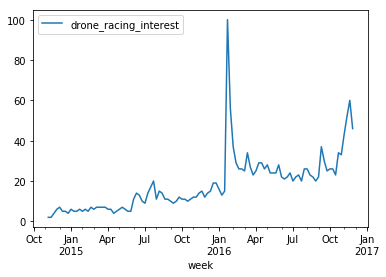

In [3]:
drones.plot();

It's clear that there is an overall increasing trend, as well as some seasonal variations.

But, if this visual check for stationarity wasn't so clear, we could use the following:
* **Plotting rolling statistics**: This is another visual technique, but it can help us see if the moving average or moving variance varies over time. 
* **Dickey-Fuller test**: This is a statistical test for checking for stationarity. The null hypothesis of this test is that the time series is non-stationary. The Dickey-Fuller test returns a test statistic that is compared to a critical value for different confidence levels. If the test statistic is less than the critical value, we reject the null hypothesis and say that the time series is stationary.

Here's a function for plotting rolling statistics and using the Dickey-Fuller test. We'll use it on our drone data. 

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determining rolling statistics:
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plotting rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Performing the Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

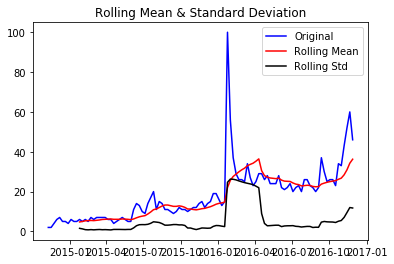

Results of Dickey-Fuller Test:
Test Statistic                  -3.811995
p-value                          0.002787
#Lags Used                       0.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [5]:
test_stationarity(drones.drone_racing_interest) 

Results of Dickey-Fuller Test:
Test Statistic                 -3.334152
p-value                         0.013419
#Lags Used                      2.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


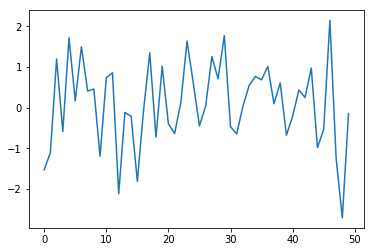

In [6]:
foo = pd.Series(np.random.randn(50))
plt.plot(foo)

# Performing the Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(foo, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.231664
p-value                         0.659829
#Lags Used                      2.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


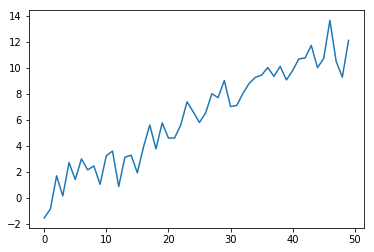

In [7]:
bar = foo + [x/4 for x in range(50)]
plt.plot(bar)

# Performing the Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(bar, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Although the variation in the standard deviation experiences one jump, the mean would seem to be increasing with time. 

But, the test statistic of the Dickey-Fuller test is less than the critical values (compare the signed values, not the absolute values) and the p-value *is* significant. Suggesting that it *is* stationary.

In many cases, the data will not be stationary. We now discuss methods for making a time series more stationary.

### Making a Time Series Stationary

Often, if our assumptions regarding stationarity don’t hold, we need to make a time series stationary. In order to do so, we first need to understand what makes a it non-stationary. Two things can do this:

1) **Trend**: Variation over time. <br>
2) **Seasonality**: Variations at specific timeframes. <br>

Although there are many ways to preprocess our data to achieve stationarity, two common methods for removing them are **detrending** and **differencing**.

### Detrending

**Detrending** removes major trends in our data. The simplest way is to fit a line to the trend, then make a new series of the difference between the line and the true series. 

Below are U.S. housing prices over time that demonstrate an upward trend. This makes the time series non-stationary, as the mean home price is increasing. The line fit through it represents the trend.

The bottom figure is the "detrended" data, where each data point is transformed by subtracting the value of the trend line at that point. This data now has a fixed mean and may be easier to model. This is similar to mean-scaling our features in earlier models with `StandardScaler`.

<img src="./assets/detrend.gif" style="float: center; height: 300px">

#### Example: Detrending
- Fit a trendline to the data.

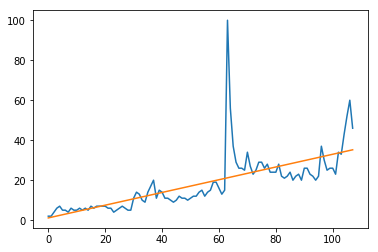

In [8]:
# Re-load drone data
drones = pd.read_csv('./datasets/gt_drone_racing.csv', header=1)
drones.columns = ['week','drone_racing_interest']

# Fit line and plot
coefs = np.polyfit(drones.index, drones.drone_racing_interest,1)
lineFunction = np.poly1d(coefs)
plt.plot(drones.index, drones.drone_racing_interest, drones.index, lineFunction(drones.index));

Detrend the time series. In its simplest form, we literally subtract the trendline from the time series.

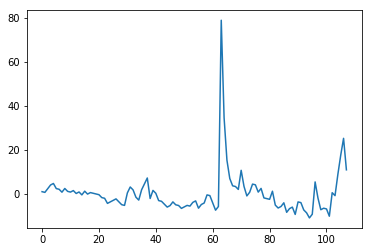

In [9]:
plt.plot(drones.index, drones.drone_racing_interest - lineFunction(drones.index));

There is also a helper function for this.

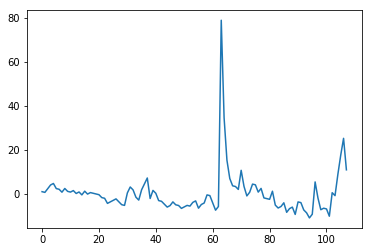

In [10]:
import scipy.signal
ffty = scipy.signal.detrend(drones.drone_racing_interest.values)
plt.plot(drones.index, ffty);

### Differencing

A related method is **differencing**. Instead of predicting the (non-stationary) series, we can predict the difference between two consecutive values. **ARIMA** models incorporate this approach.

Recall that we used Pandas' `.diff()` method to find the difference in an earlier section.

In [11]:
# Simple differencing example
s = pd.Series([1, 1, 2, 3, 5, 8])
print(s.diff(1))  
print(s.diff(-1))

0    NaN
1    0.0
2    1.0
3    1.0
4    2.0
5    3.0
dtype: float64
0    0.0
1   -1.0
2   -1.0
3   -2.0
4   -3.0
5    NaN
dtype: float64


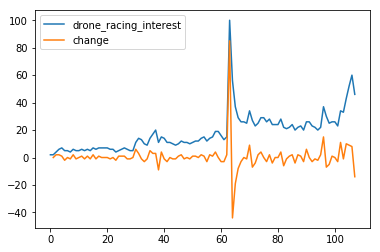

In [12]:
# More applied differencing example
drones['change'] = drones.drone_racing_interest.diff(1);
drones.plot();